In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier

In [2]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

In [3]:
# load iris dataset
data = load_iris()
x = data['data'][:,-2:]
y = data['target']

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

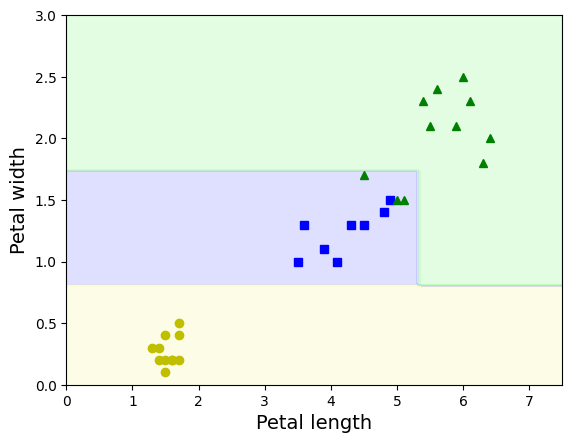

In [5]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
plot_decision_boundary(model,x_test,y_test)

In [6]:
# train DecisionTreeClassifier with [2, 3, 5, 10] max_depth

# for md in  [2, 3, 5, 10]:
#     model = DecisionTreeClassifier(max_depth=md)
#     model.fit(x_train,y_train)
#     plot_decision_boundary(model,x_test,y_test,legend=True)
#     plt.title(f'max depth = {md}')
#     plt.show()


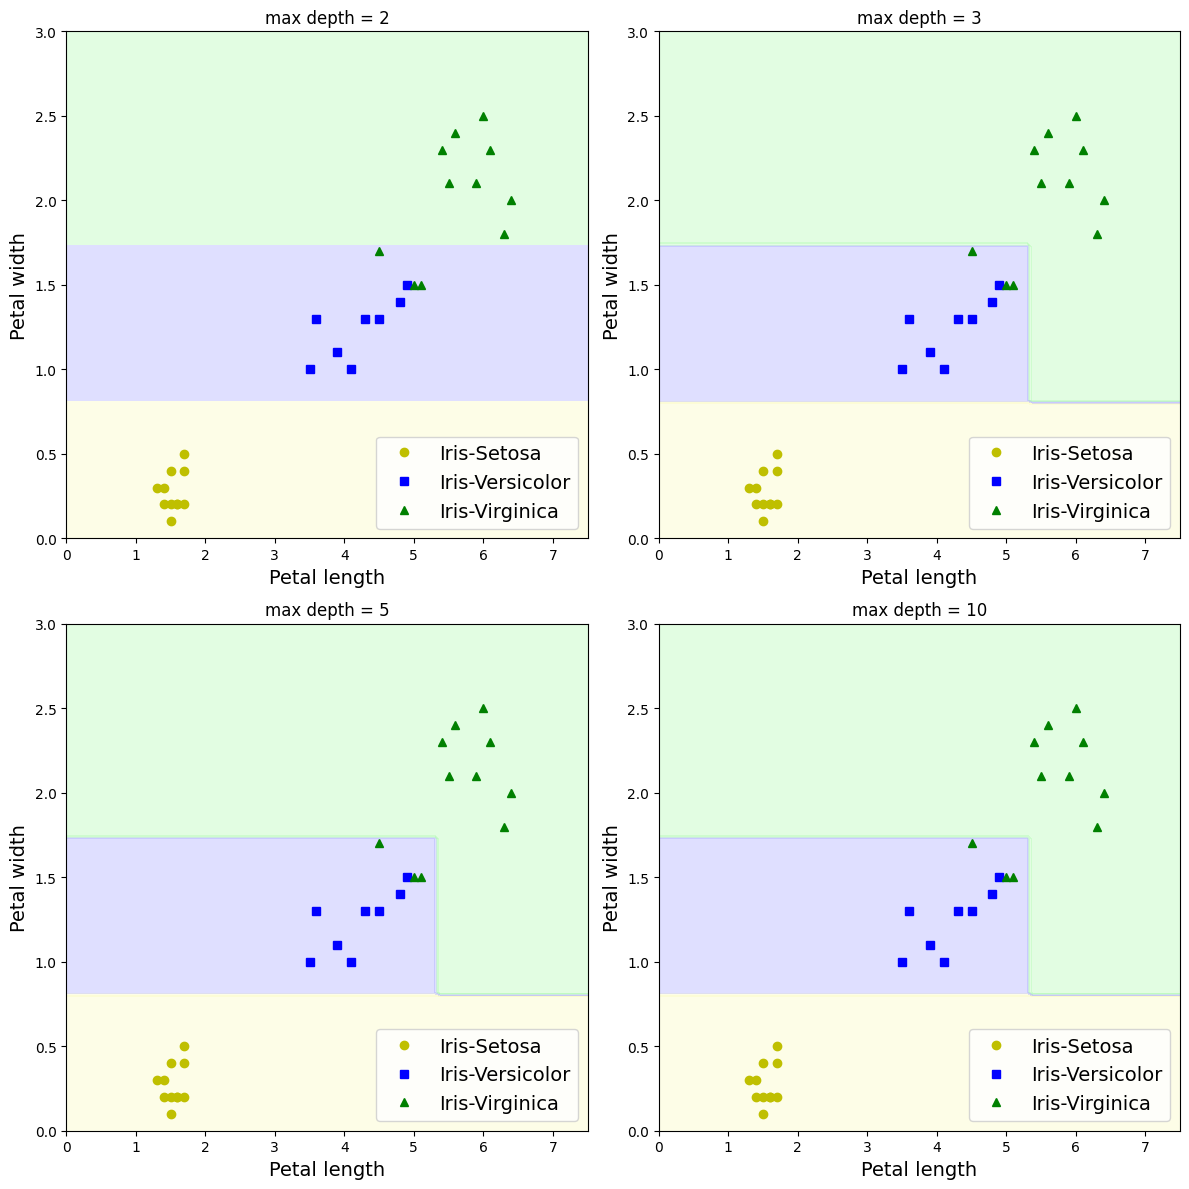

In [7]:
# train DecisionTreeClassifier with [2, 3, 5, 10] max_depth
depths = [2, 3, 5, 10]
n_cols = 2
n_rows = int(np.ceil(len(depths) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
axes = axes.ravel()

for i, md in enumerate(depths):
    model = DecisionTreeClassifier(max_depth=md)
    model.fit(x_train, y_train)
    plt.sca(axes[i])   
    plot_decision_boundary(model, x_test, y_test, legend=True)
    plt.title(f'max depth = {md}')

plt.tight_layout()
plt.show()


In [8]:
X, y = make_moons(n_samples=300, noise=0.3, random_state=42)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2)

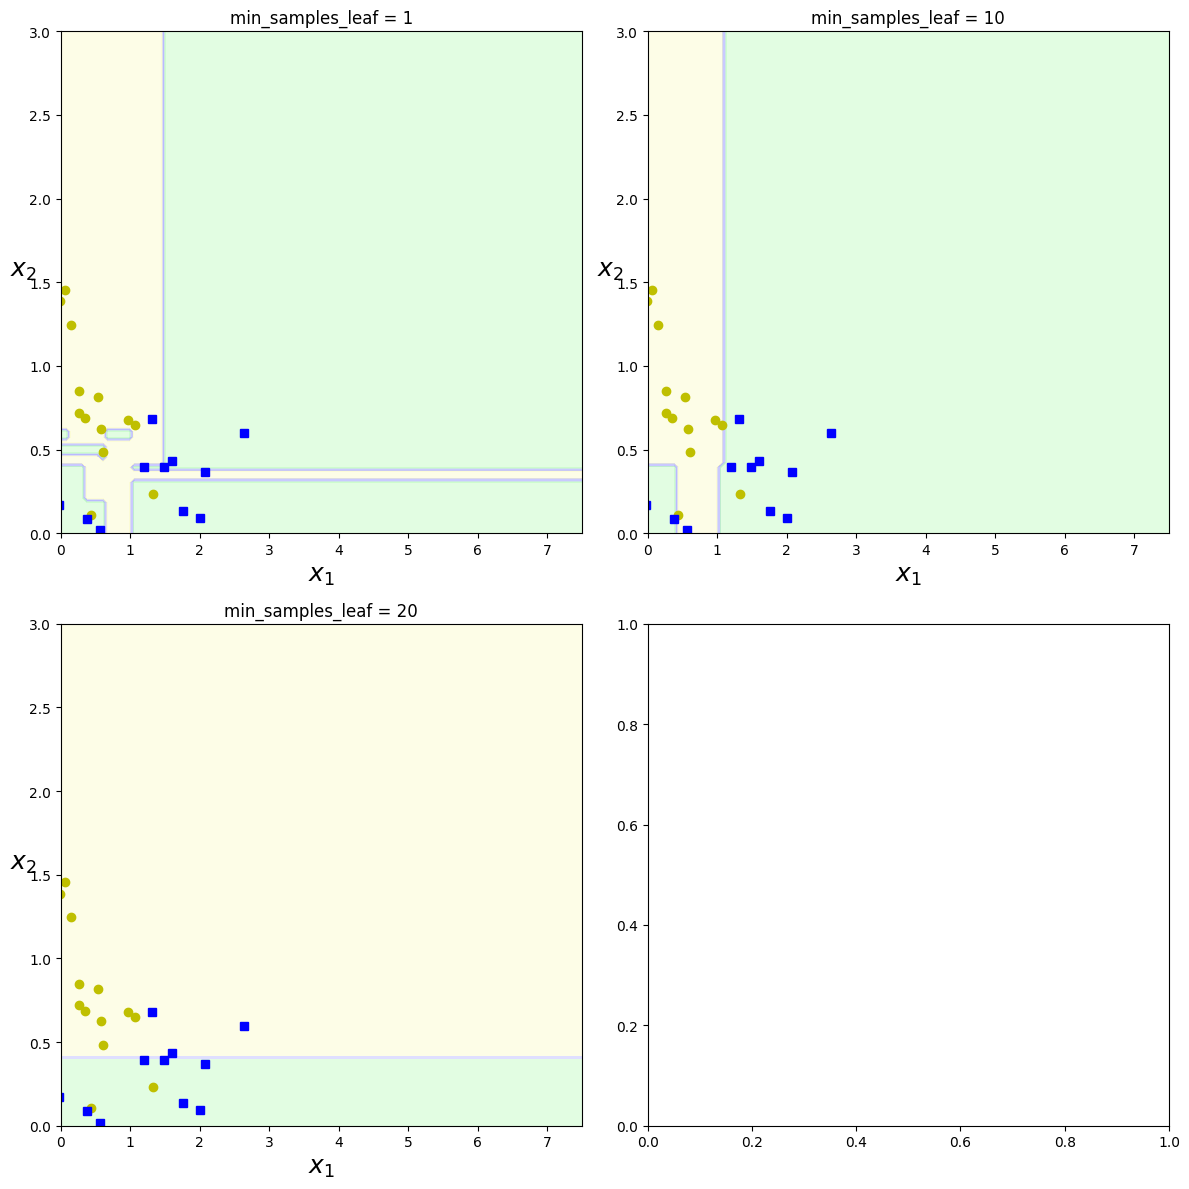

In [10]:
# train DecisionTreeClassifier with [1, 10, 20] min_samples_leaf
leaves = [1, 10, 20]
n_cols = 2
n_rows = int(np.ceil(len(leaves) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
axes = axes.ravel()

for i, msl in enumerate(leaves):
    model = DecisionTreeClassifier(min_samples_leaf=msl)
    model.fit(x_train, y_train)
    plt.sca(axes[i])   
    plot_decision_boundary(model, x_test, y_test, iris=False)
    plt.title(f'min_samples_leaf = {msl}')

plt.tight_layout()
plt.show()

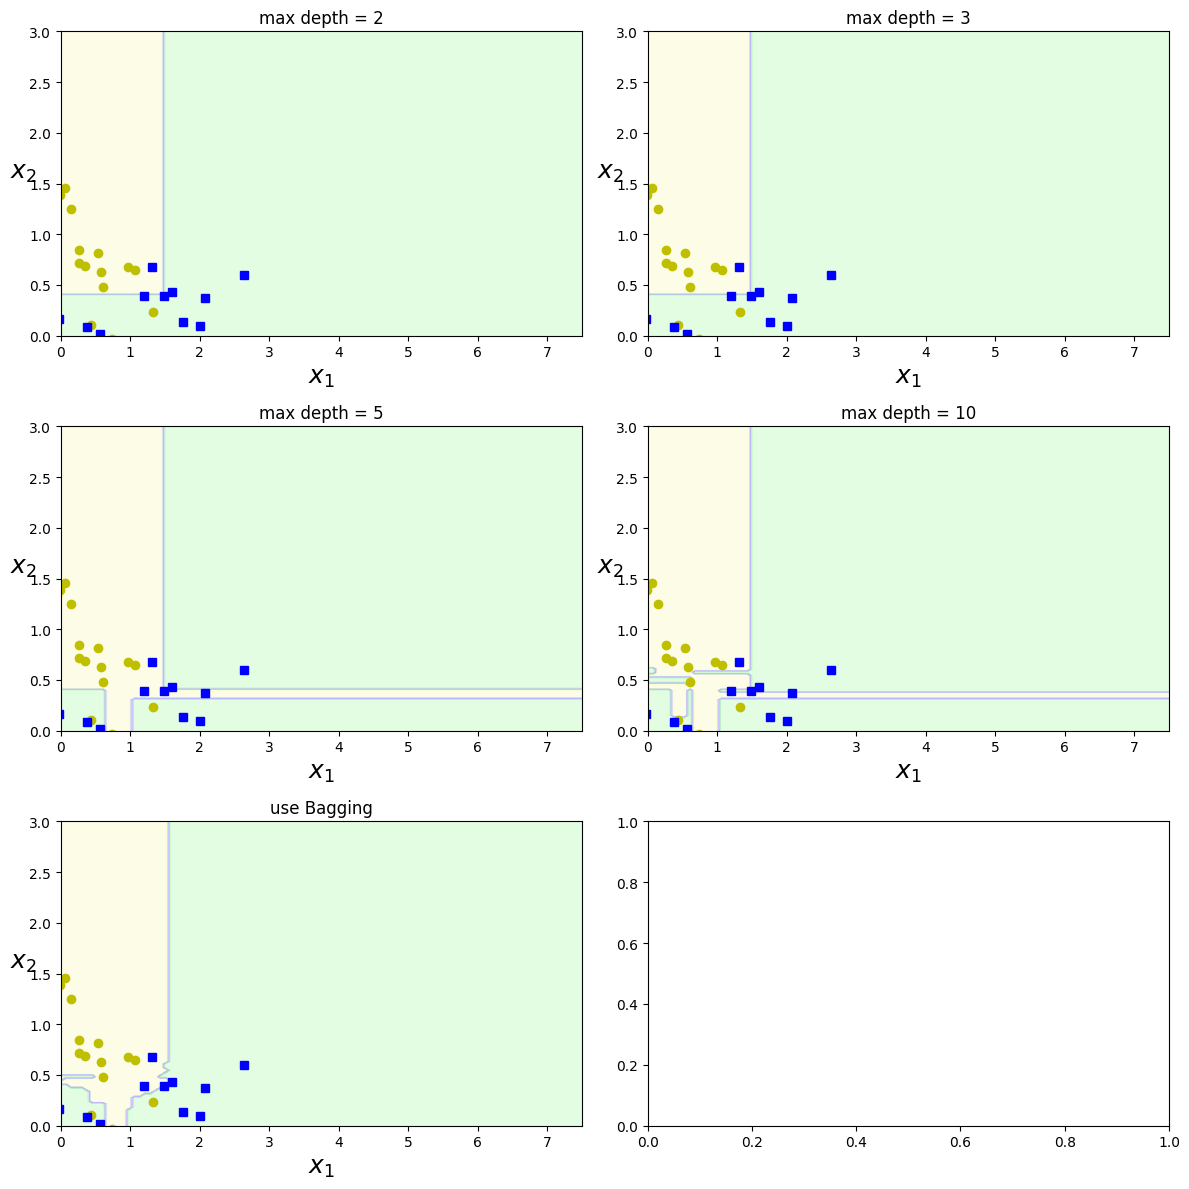

In [11]:
# train DecisionTreeClassifier with [2, 3, 5, 10] max_depth and BaggingClassifier
depths = [2, 3, 5, 10]
n_cols = 2
n_rows = int(np.ceil((len(depths)+1) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
axes = axes.ravel()

for i, md in enumerate(depths):
    model = DecisionTreeClassifier(max_depth=md)
    model.fit(x_train, y_train)
    plt.sca(axes[i])   
    plot_decision_boundary(model, x_test, y_test,  iris=False)
    plt.title(f'max depth = {md}')

base_tree = DecisionTreeClassifier(max_depth=10, random_state=42)
model = BaggingClassifier(
    estimator=base_tree,
    n_estimators=500,
    max_samples=100,
    n_jobs=-1,
)
model.fit(x_train, y_train)
plt.sca(axes[len(depths)])   
plot_decision_boundary(model, x_test, y_test, iris=False)
plt.title(f'use Bagging')

plt.tight_layout()
plt.show()


In [12]:
# !pip install scikit-optimize

In [13]:
from skopt import BayesSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [14]:
model = DecisionTreeClassifier()

params = {
    "max_depth": [2, 3, 5, 10, 20],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(x_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': [2, 3, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [15]:
params = {
    "max_depth": list(np.arange(2, 21)),
    "min_samples_split": np.arange(2, 21),
    "min_samples_leaf": np.arange(1, 21)
}
random_search = RandomizedSearchCV(model, params, n_iter=30, cv=5, n_jobs=-1, scoring="accuracy")
random_search.fit(x_train, y_train)

,estimator,DecisionTreeClassifier()
,param_distributions,"{'max_depth': [2, 3, ...], 'min_samples_leaf': array([ 1, 2... 18, 19, 20]), 'min_samples_split': array([ 2, 3... 19, 20])}"
,n_iter,30
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [16]:
params = {
    "max_depth": (1, 20),
    "min_samples_split": (2, 20),
    "min_samples_leaf": (1, 20)
}

bayes_search = BayesSearchCV(model,params, n_iter=30, cv=5, n_jobs=-1, scoring="accuracy")
bayes_search.fit(x_train, y_train)

D:\Tutorials\AI\BootCamp\aibcenv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [9, 2, 20] before, using random point [16, 7, 2]
  warnings.warn(


,estimator,DecisionTreeClassifier()
,search_spaces,"{'max_depth': (1, ...), 'min_samples_leaf': (1, ...), 'min_samples_split': (2, ...)}"
,optimizer_kwargs,None
,n_iter,30
,scoring,'accuracy'
,fit_params,None
,n_jobs,-1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,5


In [17]:
print("Best params GridSearchCV:", grid_search.best_params_)
print("Best score GridSearchCV:", grid_search.best_score_)

print("Best params RandomizedSearchCV:", random_search.best_params_)
print("Best score RandomizedSearchCV:", random_search.best_score_)

print("Best params BayesSearchCV:", bayes_search.best_params_)
print("Best score BayesSearchCV:", bayes_search.best_score_)

Best params GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best score GridSearchCV: 0.8916666666666666
Best params RandomizedSearchCV: {'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 16}
Best score RandomizedSearchCV: 0.8916666666666668
Best params BayesSearchCV: OrderedDict([('max_depth', 9), ('min_samples_leaf', 2), ('min_samples_split', 20)])
Best score BayesSearchCV: 0.8916666666666666


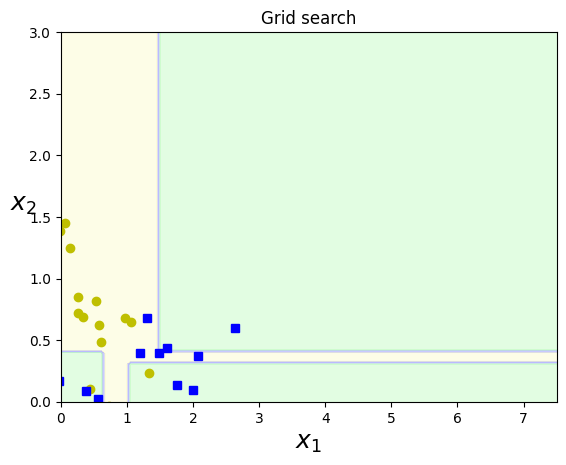

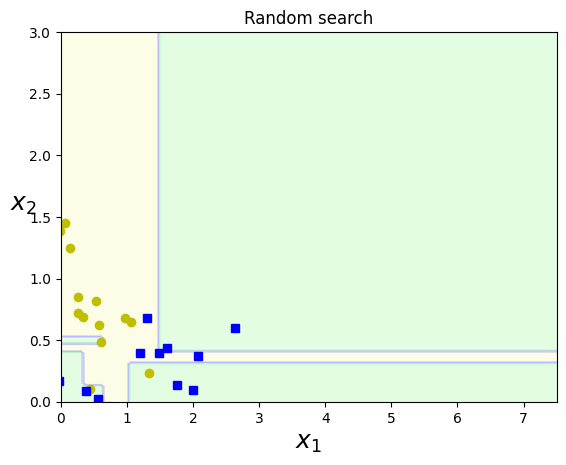

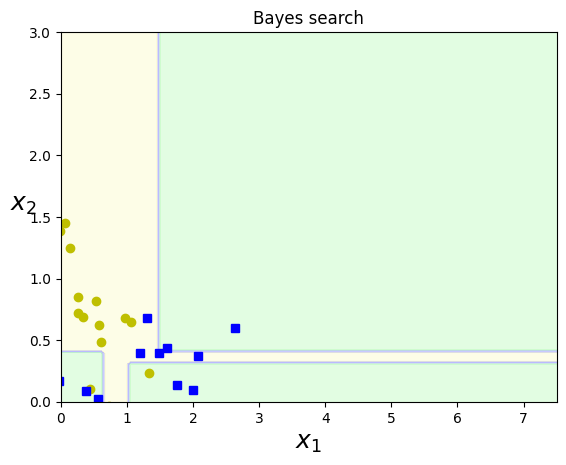

In [20]:
model = grid_search.best_estimator_
model.fit(x_train,y_train)
plot_decision_boundary(model, x_test, y_test, iris=False)
plt.title('Grid search')
plt.show()

model = random_search.best_estimator_
model.fit(x_train,y_train)
plot_decision_boundary(model, x_test, y_test, iris=False)
plt.title('Random search')
plt.show()

model = bayes_search.best_estimator_
model.fit(x_train,y_train)
plot_decision_boundary(model, x_test, y_test, iris=False)
plt.title('Bayes search')
plt.show()

In [21]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ['Decision_Trees.ipynb']
compress(file_names)

File Paths:
['Decision_Trees.ipynb']
